# Sessão 1: Configuração e Carregamento dos Dados
<div class="markdown">
Nesta primeira etapa, vamos configurar nosso ambiente importando as bibliotecas necessárias e carregar o conjunto de dados que trabalhamos duro para coletar no Sprint 1. Nosso objetivo é ter uma visão geral da estrutura e do conteúdo dos dados, garantindo que tudo foi carregado corretamente do nosso banco de dados SQLite.
</div>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

In [2]:
# Configurar o estilo dos gráficos para uma melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# --- Carregar os Dados ---
DB_NAME = "../nba_shots.sqlite"
conn = sqlite3.connect(DB_NAME)

# Usamos uma query SQL para carregar a tabela principal
query = "SELECT * FROM game_shot_charts"
df_shots = pd.read_sql_query(query, conn)

conn.close()

print("Dados carregados com sucesso!")
print(f"Total de arremessos no dataset: {len(df_shots)}")
print("\nAmostra dos dados:")
display(df_shots.head())

Dados carregados com sucesso!
Total de arremessos no dataset: 655447

Amostra dos dados:


,id,game_id,game_event_id,player_id,team_id,period,minutes_remaining,seconds_remaining,shot_made_flag,loc_x,loc_y,shot_distance,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,season
0,1,0022400001,7,1642258,1610612737,1,11,43,0,-168,205,26,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,2024-25
1,2,0022400001,10,1630552,1610612737,1,11,38,0,-136,-1,13,Driving Floating Bank Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,2024-25
2,3,0022400001,21,1630552,1610612737,1,10,50,1,157,203,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,2024-25
3,4,0022400001,34,1630811,1610612737,1,9,47,0,-176,184,25,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,2024-25
4,5,0022400001,36,203991,1610612737,1,9,44,1,-25,8,2,Putback Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2024-25


# Sessão 2: Inspeção Inicial dos Dados
<div class="markdown">
Agora que os dados estão em um DataFrame do Pandas, vamos realizar uma inspeção básica. Verificaremos os tipos de dados de cada coluna, a presença de valores nulos e obteremos estatísticas descritivas para as colunas numéricas. Isso nos ajuda a identificar possíveis problemas de qualidade de dados e a entender a escala e a distribuição das nossas variáveis.
</div>

In [3]:
# --- Análise Inicial ---
print("\nInformações do DataFrame (tipos de dados e valores nulos):")
df_shots.info()

print("\nEstatísticas Descritivas para colunas numéricas:")
display(df_shots.describe())


Informações do DataFrame (tipos de dados e valores nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655447 entries, 0 to 655446
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 655447 non-null  int64 
 1   game_id            655447 non-null  object
 2   game_event_id      655447 non-null  int64 
 3   player_id          655447 non-null  int64 
 4   team_id            655447 non-null  int64 
 5   period             655447 non-null  int64 
 6   minutes_remaining  655447 non-null  int64 
 7   seconds_remaining  655447 non-null  int64 
 8   shot_made_flag     655447 non-null  int64 
 9   loc_x              655447 non-null  int64 
 10  loc_y              655447 non-null  int64 
 11  shot_distance      655447 non-null  int64 
 12  action_type        655447 non-null  object
 13  shot_type          655447 non-null  object
 14  shot_zone_basic    655447 non-null  object
 15  shot_zon

,id,game_event_id,player_id,team_id,period,minutes_remaining,seconds_remaining,shot_made_flag,loc_x,loc_y,shot_distance
count,655447.000000,655447.000000,6.554470e+05,6.554470e+05,655447.000000,655447.000000,655447.000000,655447.000000,655447.000000,655447.000000,655447.000000
mean,327724.000000,326.928701,1.299368e+06,1.610613e+09,2.480792,5.380318,28.844584,0.472296,-1.941608,95.365488,13.666234
std,189211.395282,197.073087,6.043865e+05,8.686525e+00,1.130218,3.452747,17.409710,0.499232,114.759413,95.104081,10.613430
min,1.000000,4.000000,2.544000e+03,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-250.000000,-52.000000,0.000000
25%,163862.500000,156.000000,1.626164e+06,1.610613e+09,1.000000,2.000000,14.000000,0.000000,-49.000000,14.000000,3.000000
50%,327724.000000,325.000000,1.629012e+06,1.610613e+09,2.000000,5.000000,29.000000,0.000000,0.000000,55.000000,12.000000
75%,491585.500000,493.000000,1.630346e+06,1.610613e+09,3.000000,8.000000,44.000000,1.000000,45.000000,181.000000,25.000000
max,655447.000000,895.000000,1.642530e+06,1.610613e+09,6.000000,12.000000,59.000000,1.000000,250.000000,842.000000,85.000000


# Sessão 3: Análise da Variável Alvo (shot_made_flag)
<div class="markdown">
A variável mais importante do nosso dataset é a shot_made_flag, pois é ela que queremos prever. Vamos analisar sua distribuição para entender o balanceamento das classes. Em um problema de classificação binária, saber se as classes (arremessos convertidos vs. errados) estão balanceadas é crucial para a escolha das métricas de avaliação do modelo.
</div>

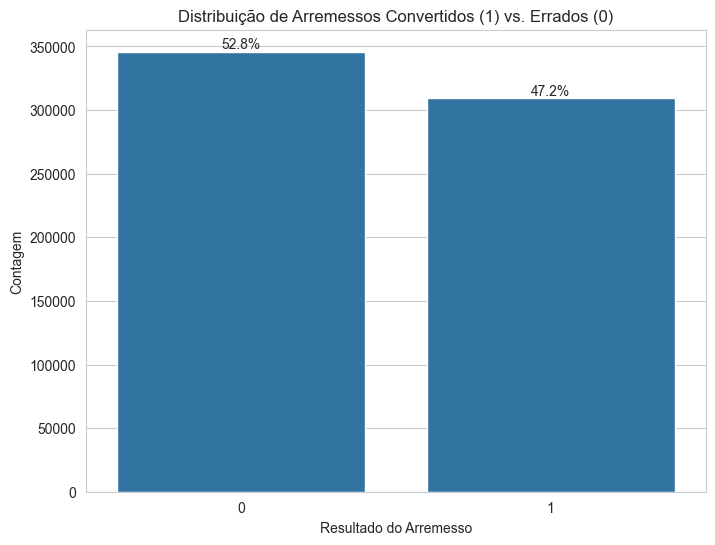

In [4]:
# Distribuição de arremessos convertidos vs. errados
plt.figure(figsize=(8, 6))
sns.countplot(x='shot_made_flag', data=df_shots)
plt.title('Distribuição de Arremessos Convertidos (1) vs. Errados (0)')
plt.xlabel('Resultado do Arremesso')
plt.ylabel('Contagem')
# Adicionar porcentagens nas barras
total = len(df_shots)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = height
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

<div class="markdown">
Observação: O gráfico acima nos mostra que as classes são relativamente balanceadas, com um pouco mais de arremessos errados do que convertidos, o que reflete a realidade da NBA (a média de acerto de arremessos de quadra fica em torno de 45-48%). Isso é uma boa notícia, pois significa que não precisaremos de técnicas complexas para lidar com dados desbalanceados nesta fase.
</div>

# Sessão 4: Análise de Características Chave e suas Relações com o Sucesso do Arremesso

<div class="markdown">
Nesta seção, vamos aprofundar a análise das variáveis que, intuitivamente, mais influenciam o resultado de um arremesso. Vamos visualizar como a taxa de acerto varia com base no tipo de arremesso, na zona da quadra e na distância. Essas visualizações são fundamentais para confirmar nossas hipóteses e para a etapa de engenharia de características.
</div>


Analisando a Taxa de Acerto por Tipo de Arremesso...


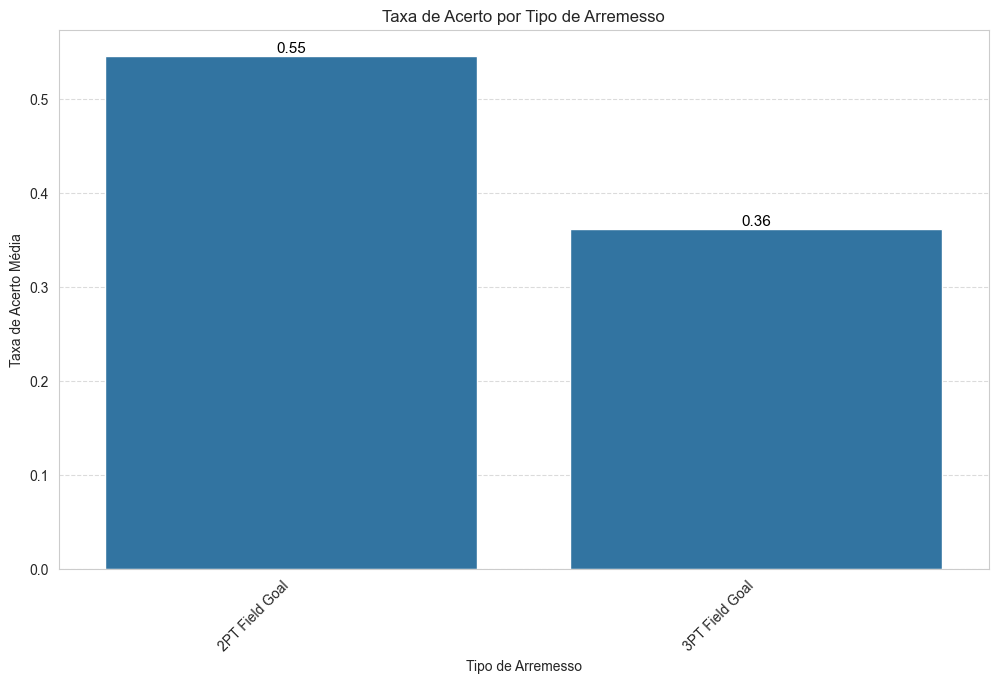

In [5]:
# 1. Análise por Zona 2 / 3 pts
# A localização geral do arremesso é fundamental. [2]
print("\nAnalisando a Taxa de Acerto por Tipo de Arremesso...")

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_shots, x='shot_type', y='shot_made_flag', 
                 order=df_shots.groupby('shot_type')['shot_made_flag'].mean().sort_values(ascending=False).index,
                 errorbar=None)
plt.title('Taxa de Acerto por Tipo de Arremesso')
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Taxa de Acerto Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Analisando a Taxa de Acerto por Tipo de Arremesso...


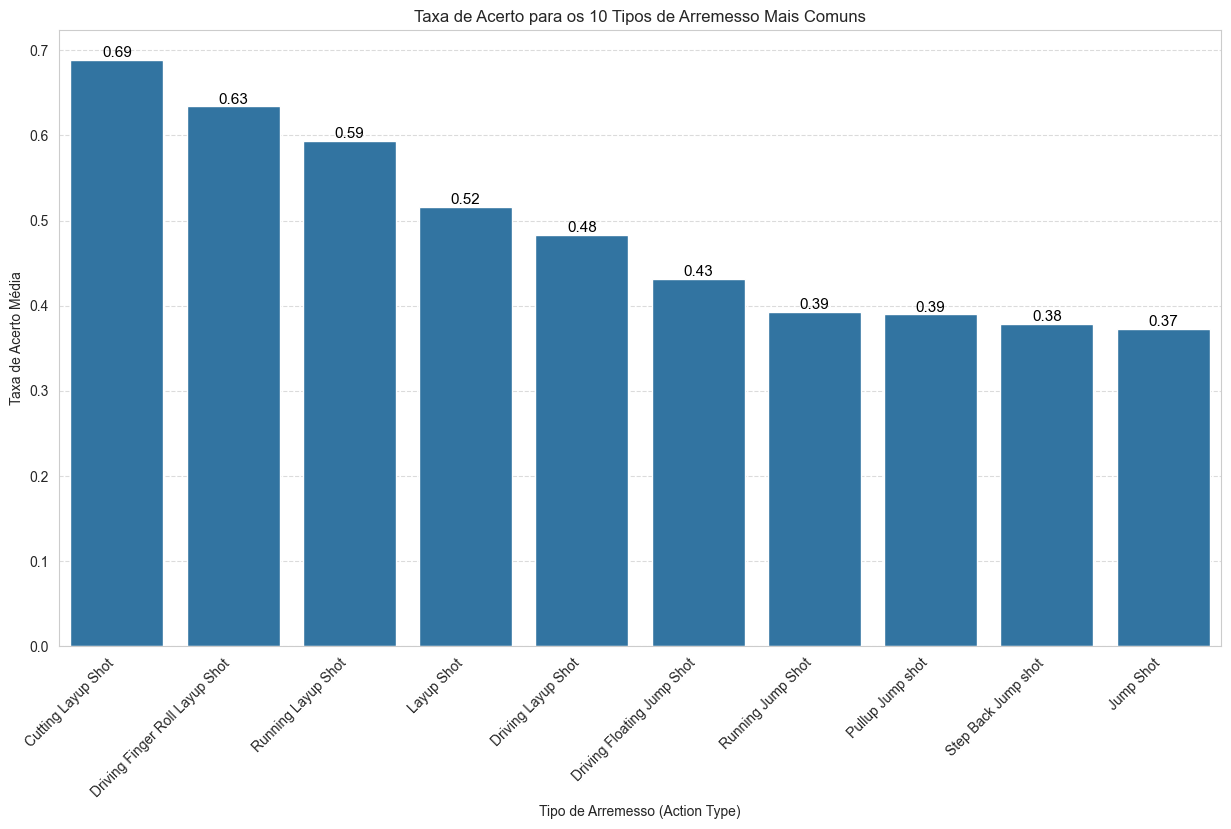

In [6]:
# 1. Análise por Tipo de Arremesso (ACTION_TYPE)
# O tipo de arremesso é um dos fatores mais cruciais para o sucesso. [1]
print("Analisando a Taxa de Acerto por Tipo de Arremesso...")

top_10_action_types = df_shots['action_type'].value_counts().nlargest(10).index
df_top_10_actions = df_shots[df_shots['action_type'].isin(top_10_action_types)]

plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_top_10_actions, x='action_type', y='shot_made_flag', errorbar=None,
                 order=df_top_10_actions.groupby('action_type')['shot_made_flag'].mean().sort_values(ascending=False).index)
plt.title('Taxa de Acerto para os 10 Tipos de Arremesso Mais Comuns')
plt.xlabel('Tipo de Arremesso (Action Type)')
plt.ylabel('Taxa de Acerto Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

<div class="markdown">
Interpretação: Como esperado, arremessos de alta probabilidade como "Layup Shot" têm taxas de acerto muito altas. Por outro lado, "Jump Shot", o tipo mais comum, tem uma eficiência consideravelmente menor. Isso confirma que action_type será uma variável categórica muito importante para o nosso modelo.
</div>


Analisando a Taxa de Acerto por Zona da Quadra...


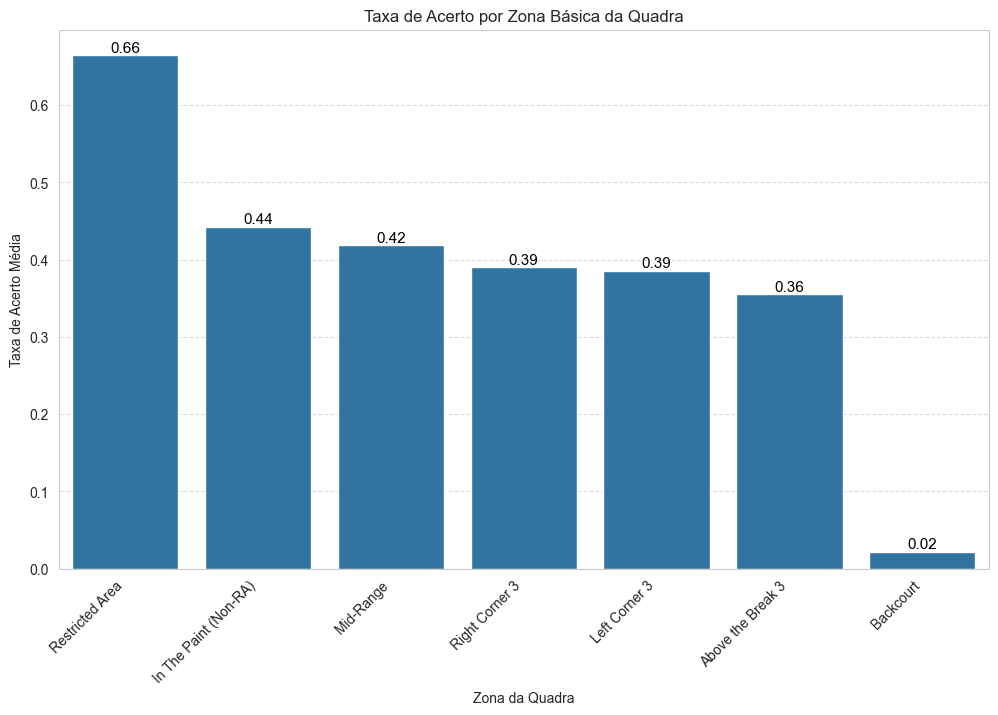

In [7]:
# 2. Análise por Zona Básica da Quadra (SHOT_ZONE_BASIC)
# A localização geral do arremesso é fundamental. [2]
print("\nAnalisando a Taxa de Acerto por Zona da Quadra...")

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_shots, x='shot_zone_basic', y='shot_made_flag', 
                 order=df_shots.groupby('shot_zone_basic')['shot_made_flag'].mean().sort_values(ascending=False).index,
                 errorbar=None)
plt.title('Taxa de Acerto por Zona Básica da Quadra')
plt.xlabel('Zona da Quadra')
plt.ylabel('Taxa de Acerto Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

<div class="markdown">
Interpretação: Este gráfico ilustra perfeitamente a filosofia do basquete moderno. A "Restricted Area" (a área imediatamente abaixo da cesta) é de longe a mais eficiente. A eficiência cai drasticamente nas zonas de "Mid-Range" e sobe um pouco para arremessos de 3 pontos, especialmente os de canto ("Corner 3"). Isso reforça a importância das variáveis de localização.
</div>


Analisando a Taxa de Acerto por Zona Area da Quadra...


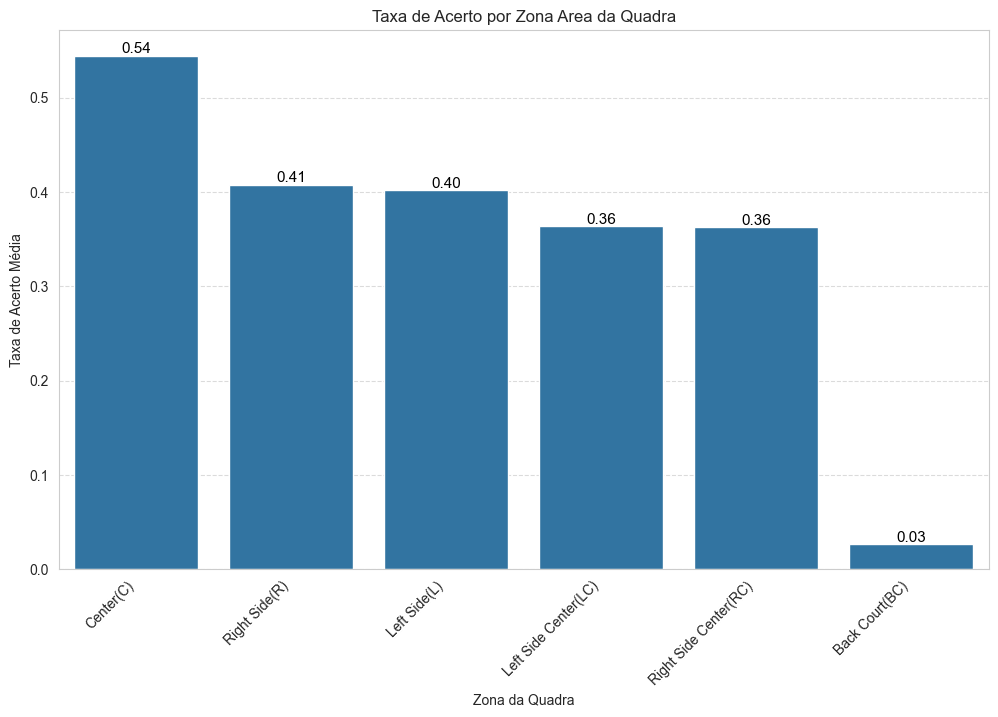

In [8]:
# 2. Análise por Zona Area da Quadra (SHOT_ZONE_AREA)
# A localização geral do arremesso é fundamental. [2]
print("\nAnalisando a Taxa de Acerto por Zona Area da Quadra...")

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_shots, x='shot_zone_area', y='shot_made_flag', 
                 order=df_shots.groupby('shot_zone_area')['shot_made_flag'].mean().sort_values(ascending=False).index,
                 errorbar=None)
plt.title('Taxa de Acerto por Zona Area da Quadra')
plt.xlabel('Zona da Quadra')
plt.ylabel('Taxa de Acerto Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


Analisando a Taxa de Acerto por Zona Rangeda Quadra...


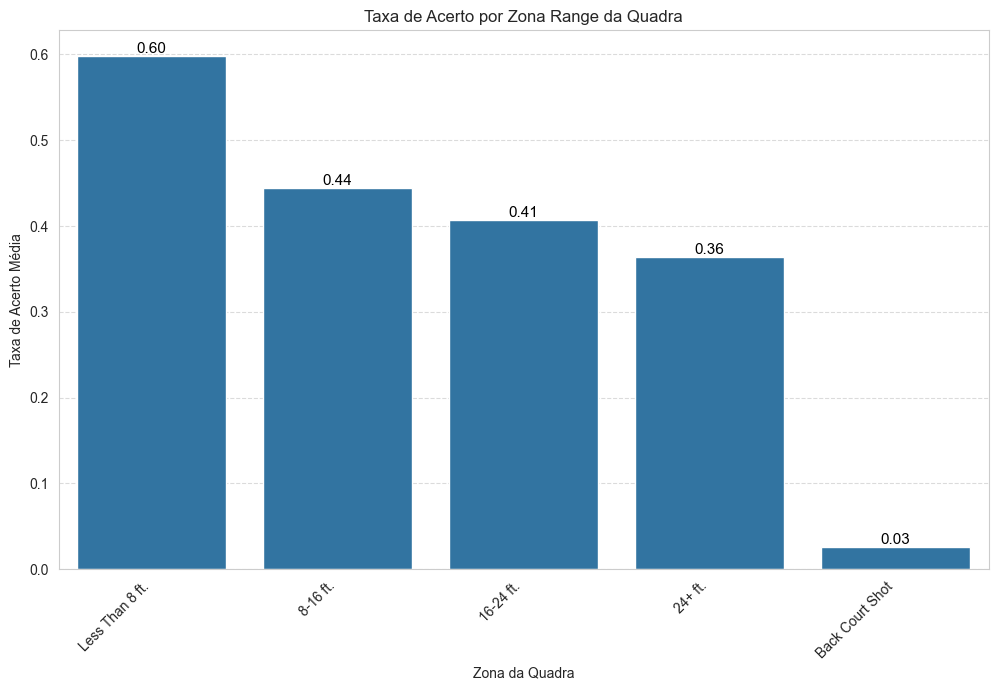

In [9]:
# 2. Análise por Zona Range da Quadra (SHOT_ZONE_AREA)
# A localização geral do arremesso é fundamental. [2]
print("\nAnalisando a Taxa de Acerto por Zona Rangeda Quadra...")

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_shots, x='shot_zone_range', y='shot_made_flag', 
                 order=df_shots.groupby('shot_zone_range')['shot_made_flag'].mean().sort_values(ascending=False).index,
                 errorbar=None)
plt.title('Taxa de Acerto por Zona Range da Quadra')
plt.xlabel('Zona da Quadra')
plt.ylabel('Taxa de Acerto Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


Analisando a Relação entre Distância e Taxa de Acerto...


/var/folders/50/h8ysk4td5h51slcq00bhxfq80000gn/T/ipykernel_83731/3669758471.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_accuracy = df_shots.groupby('distance_bin')['shot_made_flag'].mean().reset_index()


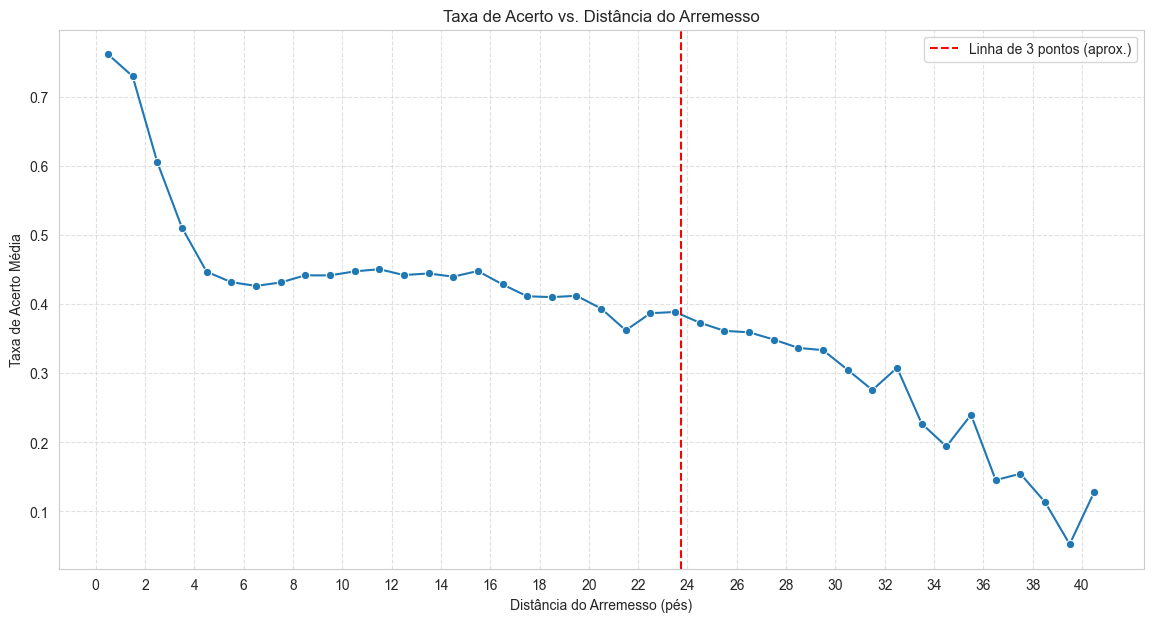

In [10]:
# 3. Relação entre Distância e Taxa de Acerto
# A distância é consistentemente um dos preditores mais fortes. 
print("\nAnalisando a Relação entre Distância e Taxa de Acerto...")

# Criamos "bins" ou "caixas" para cada pé de distância
bins = list(range(0, 42, 1))  # Convert to list explicitly
df_shots['distance_bin'] = pd.cut(df_shots['shot_distance'], bins=bins, right=False)
distance_accuracy = df_shots.groupby('distance_bin')['shot_made_flag'].mean().reset_index()
distance_accuracy['distance_mid'] = distance_accuracy['distance_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(14, 7))
sns.lineplot(data=distance_accuracy, x='distance_mid', y='shot_made_flag', marker='o')
plt.title('Taxa de Acerto vs. Distância do Arremesso')
plt.xlabel('Distância do Arremesso (pés)')
plt.ylabel('Taxa de Acerto Média')
plt.xticks(np.arange(0, 41, 2))
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.axvline(x=23.75, color='r', linestyle='--', label='Linha de 3 pontos (aprox.)')
plt.legend()
plt.show()

<div class="markdown">
Interpretação: O gráfico de linha mostra uma tendência clara e forte: a probabilidade de acerto diminui consistentemente à medida que a distância do arremesso aumenta. Há uma pequena anomalia em torno da linha de 3 pontos (23.75 pés), onde a taxa de acerto para de cair ou até sobe um pouco. Isso ocorre porque apenas arremessadores competentes tentam arremessos dessa distância, um viés de seleção que nosso modelo precisará aprender. shot_distance será, sem dúvida, uma das nossas features numéricas mais preditivas.
</div>

# Sessão 5: Visualização Espacial - O Shot Chart

<div class="markdown">
Finalmente, vamos combinar tudo em uma única visualização poderosa: o shot chart. Plotaremos cada arremesso em suas coordenadas loc_x e loc_y em um diagrama da quadra, colorindo cada ponto para indicar se foi um acerto ou um erro. Isso nos dará uma visão "de satélite" de onde os arremessos acontecem e de onde são mais eficientes.
</div>

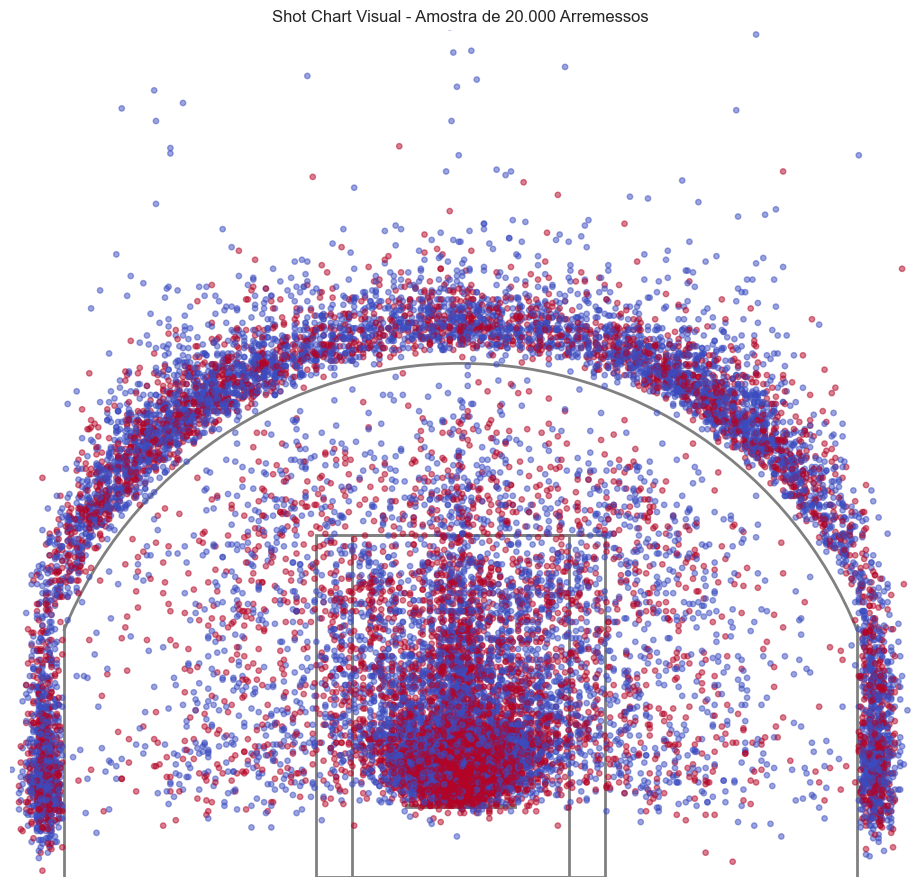

In [11]:
# Função para desenhar a quadra (simplificada)
def draw_court(ax=None, color='gray', lw=2, zorder=0):
    if ax is None:
        ax = plt.gca()
    
    # Cesta, tabela e garrafão
    hoop = patches.Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False, zorder=zorder)
    backboard = patches.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color, zorder=zorder)
    outer_box = patches.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False, zorder=zorder)
    inner_box = patches.Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False, zorder=zorder)
    
    # Linha de 3 pontos
    three_point_arc = patches.Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color, fill=False, zorder=zorder)
    
    # Linhas laterais da área de 3 pontos
    ax.plot([-220, -220], [-47.5, 92.5], linewidth=lw, color=color, zorder=zorder)
    ax.plot([220, 220], [-47.5, 92.5], linewidth=lw, color=color, zorder=zorder)

    court_elements = [hoop, backboard, outer_box, inner_box, three_point_arc]
    for element in court_elements:
        ax.add_patch(element)

    return ax

# Plotando os arremessos
plt.figure(figsize=(12, 11))
draw_court(plt.gca())
# Usamos uma amostra dos dados para não sobrecarregar o gráfico
sample_df = df_shots.sample(n=min(len(df_shots), 20000), random_state=42)
plt.scatter(sample_df['loc_x'], sample_df['loc_y'], 
            c=sample_df['shot_made_flag'], 
            cmap='coolwarm', alpha=0.5, s=15) # s é o tamanho do ponto
plt.title('Shot Chart Visual - Amostra de 20.000 Arremessos')
plt.xlim(-250, 250)
plt.ylim(-47.5, 422.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

# Sessão 6: Conclusões da EDA e Próximos Passos
<div class="markdown">
Nossa análise exploratória aprofundada revelou padrões claros e confirmou nossas hipóteses iniciais:

A Distância é Rei: shot_distance tem a correlação mais forte e intuitiva com o sucesso do arremesso.

O Contexto Importa: O tipo de arremesso (action_type) e a zona da quadra (shot_zone_basic) são preditores categóricos extremamente poderosos.

Padrões Espaciais: Os arremessos não são distribuídos aleatoriamente; eles se concentram em áreas de alta eficiência (perto da cesta e atrás da linha de 3 pontos).

Com esses insights, estamos prontos para o próximo passo crucial: Engenharia de Características. Usaremos o que aprendemos aqui para selecionar, transformar e criar as variáveis que alimentarão nosso modelo XGBoost, preparando o terreno para a construção de um modelo preditivo robusto e preciso.

</div>